In [64]:
import pandas as pd
import heartpy as hp
import neurokit2 as nk

In [56]:
data = pd.read_pickle(f'/home/ilya/Documents/stress-level-by-PPG/filt_dataset.pkl')

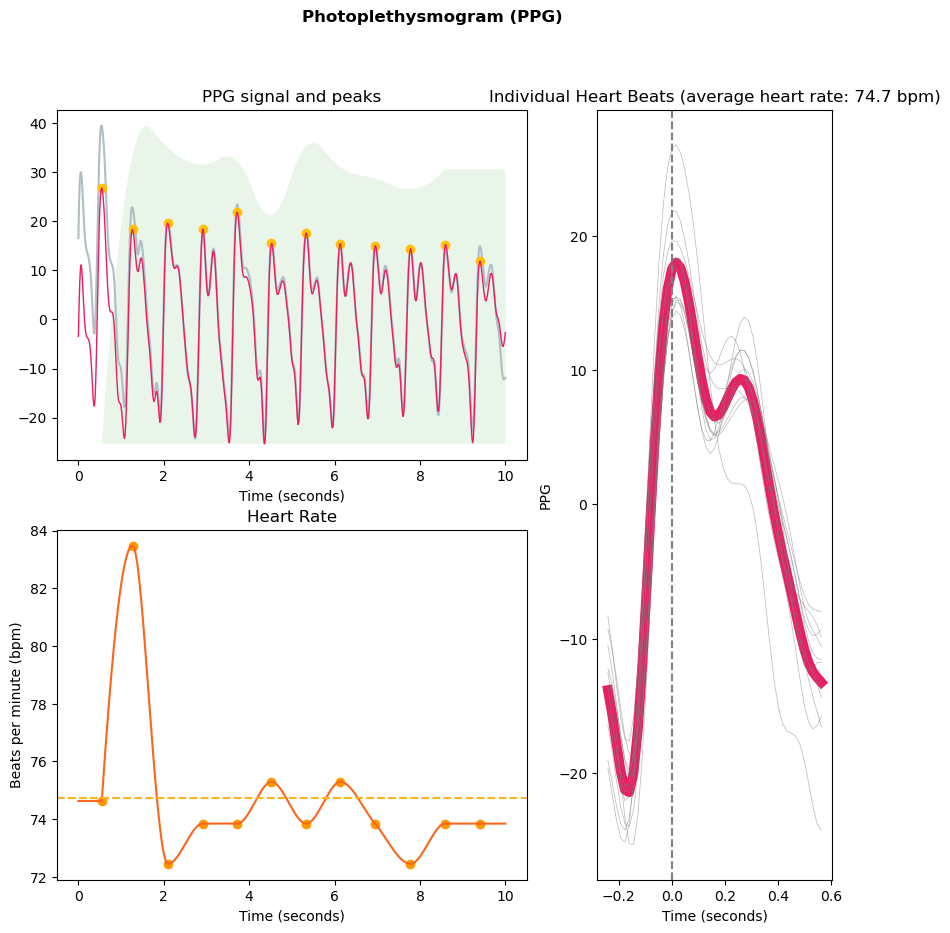

In [66]:
signals, info = nk.ppg_process(data['S15']['PPG_medit'][0:10 * 64], sampling_rate=64)
nk.ppg_plot(signals, info)

In [57]:
print(f'Count sec for ppg signal')

for person_name, person_data in data.items():
    print(f'{person_name}: md: {len(person_data['PPG_medit']) // 64}, st: {len(person_data['PPG_stress']) // 64}')

Count sec for ppg signal
S4: md: 0, st: 14
S7: md: 270, st: 14
S13: md: 0, st: 0
S2: md: 271, st: 12
S14: md: 383, st: 0
S17: md: 34, st: 58
S3: md: 24, st: 13
S8: md: 0, st: 0
S9: md: 0, st: 93
S11: md: 0, st: 0
S16: md: 0, st: 13
S15: md: 295, st: 196
S6: md: 27, st: 58
S10: md: 334, st: 16
S5: md: 162, st: 0


In [58]:
fr_ppg = 64
wind_size = 10 * fr_ppg

dataset = []

In [59]:
def add_to_dataset(ppg, label):
    i = wind_size
    
    if len(ppg) >= (wind_size * 2):
        while(i + wind_size < len(ppg)):
            slice_ppg = ppg[i - wind_size : i + wind_size]
            _, m = hp.process(hp.scale_data(slice_ppg), sample_rate=fr_ppg, clean_rr=True)

            m['stress_index'] = label
            dataset.append(m)
            i += wind_size

    elif len(ppg) > 10 * fr_ppg:
        _, m = hp.process(ppg, sample_rate=fr_ppg)
        m['stress_index'] = label
        dataset.append(m)

In [60]:
for person_name, person_data in data.items():
    ppg = person_data['PPG_medit']
    add_to_dataset(ppg, person_data['stress_lvl_for_medit'])

    ppg = person_data['PPG_stress']
    add_to_dataset(ppg, person_data['stress_lvl_for_stress'])


/home/ilya/miniconda3/envs/SOBES/lib/python3.13/site-packages/heartpy/analysis.py:677: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  interp = UnivariateSpline(x, rrlist, k=3)
/home/ilya/miniconda3/envs/SOBES/lib/python3.13/site-packages/numpy/ma/core.py:5445: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/home/ilya/miniconda3/envs/SOBES/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4268: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [61]:
pd_dataset = pd.DataFrame(dataset)
pd_dataset.to_csv("ppg_feature.csv", index=False)